# 주가 예측 모델

# 데이터 로딩

In [1]:
!pip install finance-datareader

In [59]:
import FinanceDataReader as fdr
company = '005930'  # 삼성전자
# company = '000660' # 하이닉스
startdate = '1999-08-11'
enddate = '2023-11-28'
stock = fdr.DataReader(company, startdate, enddate)
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-08-11,3900,3940,3700,3710,958530,NaN
1999-08-12,3800,3860,3730,3800,740069,0.024259
1999-08-13,3699,3779,3610,3700,719845,-0.026316
1999-08-16,3680,3890,3640,3800,700220,0.027027
1999-08-17,3820,3870,3660,3680,759830,-0.031579
...,...,...,...,...,...,...
2023-11-22,72200,73000,71900,72800,11105143,0.000000
2023-11-23,73000,73200,72200,72400,6775614,-0.005495
2023-11-24,72400,72600,71700,71700,6676685,-0.009669


In [60]:
del stock['Change']
stock

,Open,High,Low,Close,Volume
Date,,,,,
1999-08-11,3900,3940,3700,3710,958530
1999-08-12,3800,3860,3730,3800,740069
1999-08-13,3699,3779,3610,3700,719845
1999-08-16,3680,3890,3640,3800,700220
1999-08-17,3820,3870,3660,3680,759830
...,...,...,...,...,...
2023-11-22,72200,73000,71900,72800,11105143
2023-11-23,73000,73200,72200,72400,6775614
2023-11-24,72400,72600,71700,71700,6676685


## 데이터 추가

In [61]:
dow = fdr.DataReader('DJI', startdate, enddate)
nas = fdr.DataReader('IXIC', startdate, enddate)
nvda = fdr.DataReader('NVDA', startdate, enddate)
amd = fdr.DataReader('AMD', startdate, enddate)
intc = fdr.DataReader('INTC', startdate, enddate)
kospi = fdr.DataReader('KS11', startdate, enddate)

In [62]:
kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
1999-08-11,965.73,973.91,941.56,944.08,291834780,-0.0254,2,-24.58,4487293000000,NaN
1999-08-12,946.48,958.83,939.58,949.35,255837400,0.0056,1,5.27,3483471000000,NaN
1999-08-13,940.62,945.00,908.49,917.47,270181080,-0.0336,2,-31.88,3738478000000,NaN
1999-08-16,904.22,924.80,895.11,907.28,219584050,-0.0111,2,-10.19,3218929000000,NaN
1999-08-17,911.45,925.63,872.57,873.70,270865460,-0.0370,2,-33.58,3900555000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-11-22,2493.17,2516.72,2490.43,2511.70,439485471,0.0005,1,1.28,7755315532472,2.006110e+15
2023-11-23,2515.83,2522.20,2507.30,2514.96,360873812,0.0013,1,3.26,6577868002160,2.009136e+15
2023-11-24,2517.88,2521.56,2496.63,2496.63,359382702,-0.0073,2,-18.33,6537960544304,1.995161e+15


In [63]:
stock['DOW'] = dow['Close'].shift(1)
stock['NAS'] = nas['Close'].shift(1)
stock['NVDA'] = nvda['Close'].shift(1)
stock['AMD'] = amd['Close'].shift(1)
stock['INTC'] = intc['Close'].shift(1)
stock['KS11'] = kospi['Close']
stock

,Open,High,Low,Close,Volume,DOW,NAS,NVDA,AMD,INTC,KS11
Date,,,,,,,,,,,
1999-08-11,3900,3940,3700,3710,958530,NaN,NaN,NaN,NaN,NaN,944.08
1999-08-12,3800,3860,3730,3800,740069,10787.799805,2564.979980,0.418098,9.468750,21.866957,949.35
1999-08-13,3699,3779,3610,3700,719845,10789.389648,2549.489990,0.438406,9.250000,21.848967,917.47
1999-08-16,3680,3890,3640,3800,700220,10973.650391,2637.810059,0.433627,9.468750,22.945915,907.28
1999-08-17,3820,3870,3660,3680,759830,11046.790039,2645.280029,0.416903,9.375000,22.604235,873.70
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,72200,73000,71900,72800,11105143,35088.289063,14199.980469,499.440002,119.160004,43.639999,2511.70
2023-11-23,73000,73200,72200,72400,6775614,NaN,NaN,NaN,NaN,NaN,2514.96
2023-11-24,72400,72600,71700,71700,6676685,35273.031250,14265.860352,487.160004,122.510002,43.669998,2496.63


In [64]:
stock['Close2'] = stock['Close']
stock

,Open,High,Low,Close,Volume,DOW,NAS,NVDA,AMD,INTC,KS11,Close2
Date,,,,,,,,,,,,
1999-08-11,3900,3940,3700,3710,958530,NaN,NaN,NaN,NaN,NaN,944.08,3710
1999-08-12,3800,3860,3730,3800,740069,10787.799805,2564.979980,0.418098,9.468750,21.866957,949.35,3800
1999-08-13,3699,3779,3610,3700,719845,10789.389648,2549.489990,0.438406,9.250000,21.848967,917.47,3700
1999-08-16,3680,3890,3640,3800,700220,10973.650391,2637.810059,0.433627,9.468750,22.945915,907.28,3800
1999-08-17,3820,3870,3660,3680,759830,11046.790039,2645.280029,0.416903,9.375000,22.604235,873.70,3680
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,72200,73000,71900,72800,11105143,35088.289063,14199.980469,499.440002,119.160004,43.639999,2511.70,72800
2023-11-23,73000,73200,72200,72400,6775614,NaN,NaN,NaN,NaN,NaN,2514.96,72400
2023-11-24,72400,72600,71700,71700,6676685,35273.031250,14265.860352,487.160004,122.510002,43.669998,2496.63,71700


## NaN 처리

In [65]:
stock = stock.fillna(method = 'ffill')
stock

,Open,High,Low,Close,Volume,DOW,NAS,NVDA,AMD,INTC,KS11,Close2
Date,,,,,,,,,,,,
1999-08-11,3900,3940,3700,3710,958530,NaN,NaN,NaN,NaN,NaN,944.08,3710
1999-08-12,3800,3860,3730,3800,740069,10787.799805,2564.979980,0.418098,9.468750,21.866957,949.35,3800
1999-08-13,3699,3779,3610,3700,719845,10789.389648,2549.489990,0.438406,9.250000,21.848967,917.47,3700
1999-08-16,3680,3890,3640,3800,700220,10973.650391,2637.810059,0.433627,9.468750,22.945915,907.28,3800
1999-08-17,3820,3870,3660,3680,759830,11046.790039,2645.280029,0.416903,9.375000,22.604235,873.70,3680
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,72200,73000,71900,72800,11105143,35088.289063,14199.980469,499.440002,119.160004,43.639999,2511.70,72800
2023-11-23,73000,73200,72200,72400,6775614,35088.289063,14199.980469,499.440002,119.160004,43.639999,2514.96,72400
2023-11-24,72400,72600,71700,71700,6676685,35273.031250,14265.860352,487.160004,122.510002,43.669998,2496.63,71700


In [66]:
stock.dropna(axis=0, inplace=True)

## 정규화

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

stock.iloc[:, 0:-1] = scaler.fit_transform(stock.iloc[:, 0:-1])
stock

,Open,High,Low,Close,Volume,DOW,NAS,NVDA,AMD,INTC,KS11,Close2
Date,,,,,,,,,,,,
1999-08-12,-1.079507,-1.080687,-1.079041,-1.081275,-0.432592,-0.735582,-0.613536,-0.476741,-0.492143,-0.186420,-1.124829,3800
1999-08-13,-1.084152,-1.084384,-1.084607,-1.085878,-0.435341,-0.735388,-0.617626,-0.476504,-0.499181,-0.187801,-1.172054,3700
1999-08-16,-1.085026,-1.079318,-1.083216,-1.081275,-0.438009,-0.712979,-0.594306,-0.476560,-0.492143,-0.103618,-1.187149,3800
1999-08-17,-1.078587,-1.080231,-1.082288,-1.086799,-0.429906,-0.704084,-0.592333,-0.476755,-0.495159,-0.129839,-1.236893,3680
1999-08-18,-1.088705,-1.085251,-1.087854,-1.086799,-0.438640,-0.695536,-0.585481,-0.476741,-0.497170,-0.120178,-1.243945,3680
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,2.066294,2.074362,2.083000,2.094842,0.976417,2.219731,2.458609,5.354827,3.036869,1.484513,1.189572,72800
2023-11-23,2.103087,2.083489,2.096915,2.076430,0.387869,2.219731,2.458609,5.354827,3.036869,1.484513,1.194401,72400
2023-11-24,2.075493,2.056109,2.073723,2.044208,0.374421,2.242199,2.476004,5.211323,3.144646,1.486815,1.167247,71700


## train / test 분리

In [69]:
import numpy as np

# numpy 배열로 변환
window_size = 20  # 20일치의 데이터로 그 다음날의 종가를 예측
x = []
y = []

for i in range(len(stock) - window_size):
  temp0 = stock.iloc[i:i+window_size, 0:-1]
  x.append(temp0)
  temp1 = stock.iloc[i+window_size, -1]
  y.append(temp1)

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(5979, 20, 11)
(5979,)


In [70]:
begin_2023 = stock.index.get_loc('2023-01-02')
begin_2023

5775

In [71]:
split_point = begin_2023 - window_size
split_point

5755

In [72]:
x_train = x[:split_point]
y_train = y[:split_point]

x_test = x[split_point:]
y_test = y[split_point:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5755, 20, 11) (5755,)
(224, 20, 11) (224,)


## train / valid 분리

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(4604, 20, 11) (4604,)
(1151, 20, 11) (1151,)
(224, 20, 11) (224,)


## Modeling
- LSTM

In [74]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint('samsung.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [78]:
model = Sequential()
model.add(LSTM(32, activation='tanh', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='softplus'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam', metrics='mae')

history = model.fit(x_train, y_train, epochs=100, callbacks=[mc, es], validation_data=(x_val, y_val))

Epoch 1/100
139/144 [===========================>..] - ETA: 0s - loss: 24936.9160 - mae: 24936.9160
Epoch 1: val_mae did not improve from 637.41187
144/144 [==============================] - 5s 14ms/step - loss: 24746.7090 - mae: 24746.7090 - val_loss: 20114.0488 - val_mae: 20114.0488
Epoch 2/100
137/144 [===========================>..] - ETA: 0s - loss: 11242.1855 - mae: 11242.1855
Epoch 2: val_mae did not improve from 637.41187
144/144 [==============================] - 1s 7ms/step - loss: 10889.8486 - mae: 10889.8486 - val_loss: 2974.7449 - val_mae: 2974.7449
Epoch 3/100
137/144 [===========================>..] - ETA: 0s - loss: 3280.7544 - mae: 3280.7544
Epoch 3: val_mae did not improve from 637.41187
144/144 [==============================] - 1s 6ms/step - loss: 3261.6172 - mae: 3261.6172 - val_loss: 1363.8866 - val_mae: 1363.8866
Epoch 4/100
136/144 [===========================>..] - ETA: 0s - loss: 2819.8157 - mae: 2819.8157
Epoch 4: val_mae did not improve from 637.41187
144/14

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


139/144 [===========================>..] - ETA: 0s - loss: 2546.8867 - mae: 2546.8867
Epoch 28: val_mae did not improve from 611.02454
144/144 [==============================] - 1s 9ms/step - loss: 2548.6033 - mae: 2548.6033 - val_loss: 642.7191 - val_mae: 642.7191
Epoch 29/100
144/144 [==============================] - ETA: 0s - loss: 2592.9080 - mae: 2592.9080
Epoch 29: val_mae did not improve from 611.02454
144/144 [==============================] - 1s 7ms/step - loss: 2592.9080 - mae: 2592.9080 - val_loss: 641.5701 - val_mae: 641.5701
Epoch 30/100
138/144 [===========================>..] - ETA: 0s - loss: 2541.4036 - mae: 2541.4036
Epoch 30: val_mae did not improve from 611.02454
144/144 [==============================] - 1s 7ms/step - loss: 2534.7935 - mae: 2534.7935 - val_loss: 730.7819 - val_mae: 730.7819
Epoch 31/100
136/144 [===========================>..] - ETA: 0s - loss: 2593.9460 - mae: 2593.9460
Epoch 31: val_mae did not improve from 611.02454
144/144 [===================

In [79]:
model = load_model('samsung.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])

Test Loss: 1396.642333984375


7/7 [==============================] - 0s 3ms/step


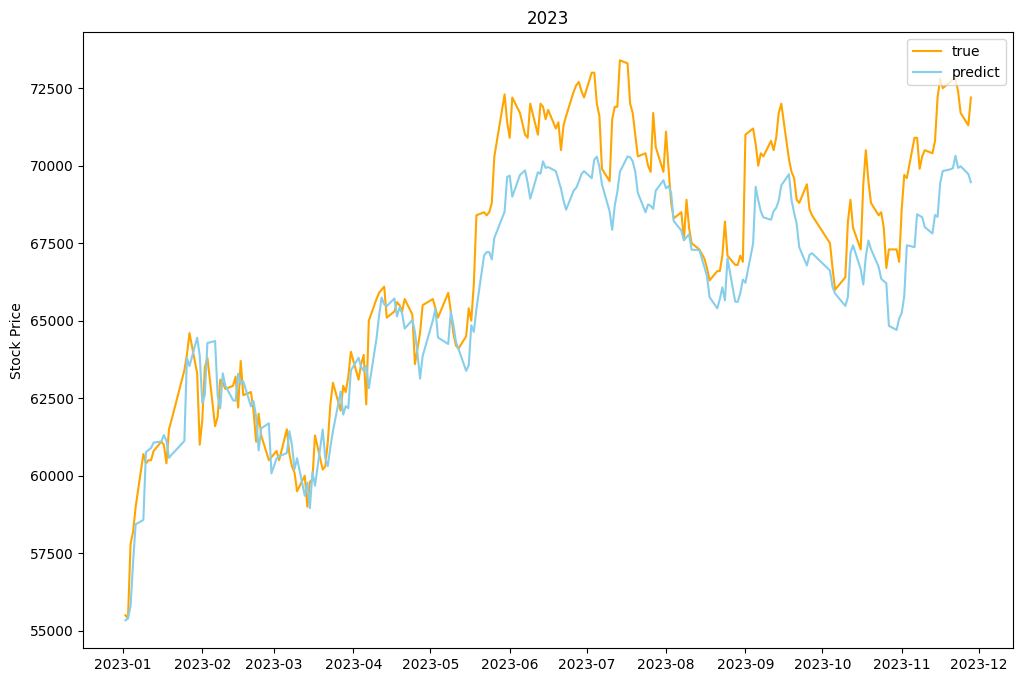

In [80]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
days_2023 = stock.index[stock.index>='2023-01-02']

plt.figure(figsize=(12, 8))
plt.title('2023')
plt.plot(days_2023, y_test, 'orange', label='true')
plt.plot(days_2023, y_pred, 'skyblue', label='predict')
plt.ylabel('Stock Price')
plt.legend(loc='upper right')
plt.show()

In [48]:
y_test.shape

(223,)